In [1]:
import os
import sys
sys.path.append("../")

In [2]:
import pandas as pd
import time
from plugins.interfaces.diagnostics import EPICSImageDiagnostic, ROI

screen_name = "13ARV1"
save_image_location = "/home/awa/awa_data/12-05_6DReconstruction/YAG_centering"
TESTING = False
DYG14_IP = 1
DYG15_IP = 2
charge_pvs = []

# screen size in pxls should be the same for both YAGS:
xwidth = 700
ywidth = 700

dyg14_roi = ROI(
    xcenter = 567,
    ycenter = 806,
    xwidth = xwidth,
    ywidth = ywidth
)
dyg15_roi = ROI(
    xcenter = 595,
    ycenter = 1071,
    xwidth = xwidth,
    ywidth = ywidth
)

DYG14 = EPICSImageDiagnostic(
    screen_name=screen_name,
    resolution_suffix=None,
    #roi=dyg14_roi,
    extra_pvs=charge_pvs,
    save_image_location=save_image_location,
    testing=TESTING,
    #target_charge=1.0,
    #target_charge_pv="ICT1"
)

DYG15 = EPICSImageDiagnostic(
    screen_name=screen_name,
    resolution_suffix=None,
    roi=dyg15_roi,
    extra_pvs=charge_pvs,
    save_image_location=save_image_location,
    testing=TESTING
)

def set_camera(ip_address, testing=False):
    if not testing:
        from epics import caput
        # stop the current camera
        caput("13ARV1:cam1:Acquire", 0)
        time.sleep(1)
        # set the new camera IP address
        caput("13ARV1:cam1:GC_SetCameraName", ip_address)
        time.sleep(1)
        # start the new camera
        caput("13ARV1:cam1:Acquire", 1)

        time.sleep(10)


displaying image
fitting image


{'Cx': nan,
 'Cy': nan,
 'Sx': nan,
 'Sy': nan,
 'bb_penalty': nan,
 'total_intensity': 10884041152.0,
 'log10_total_intensity': 10.036790175155932}

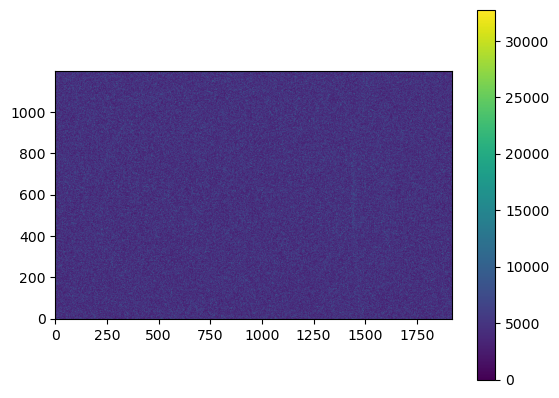

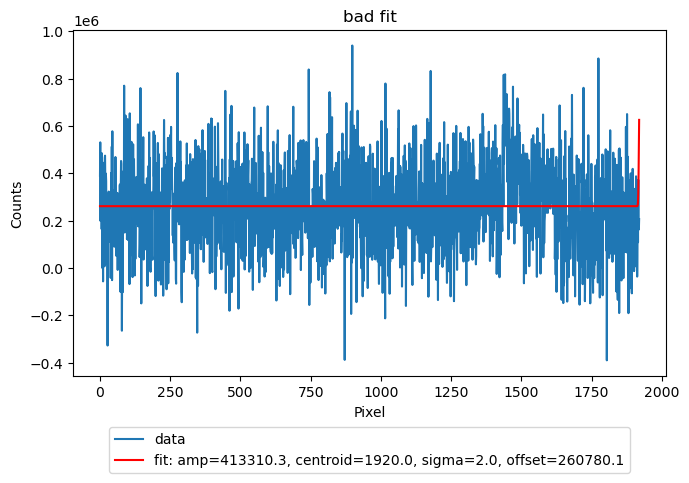

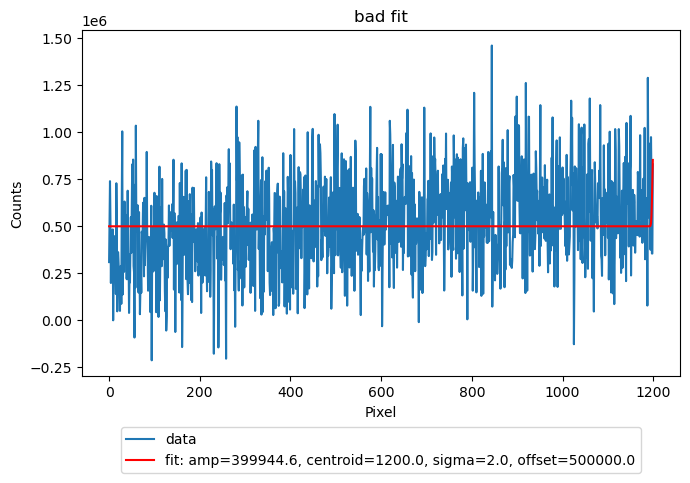

In [9]:
set_camera("192.168.2.111")
DYG14.test_measurement()

displaying image
fitting image


{'Cx': nan,
 'Cy': nan,
 'Sx': nan,
 'Sy': nan,
 'bb_penalty': nan,
 'total_intensity': 1181976784.0,
 'log10_total_intensity': 9.072608946359356}

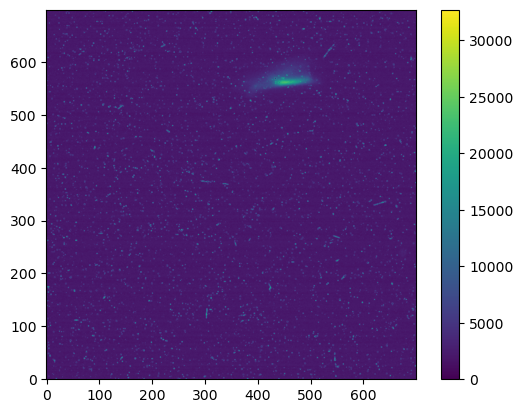

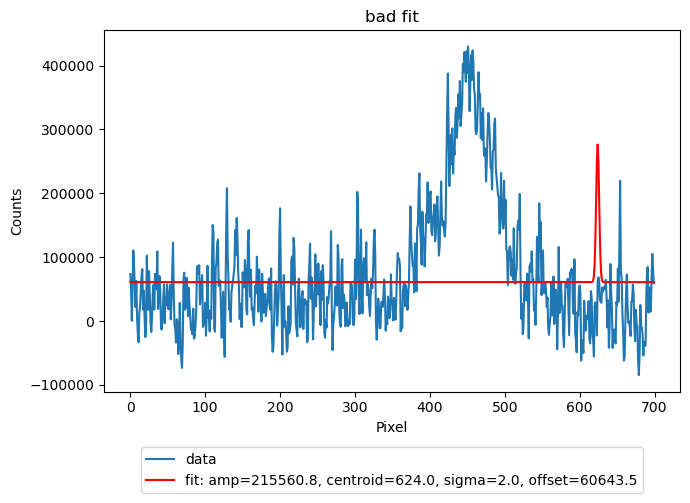

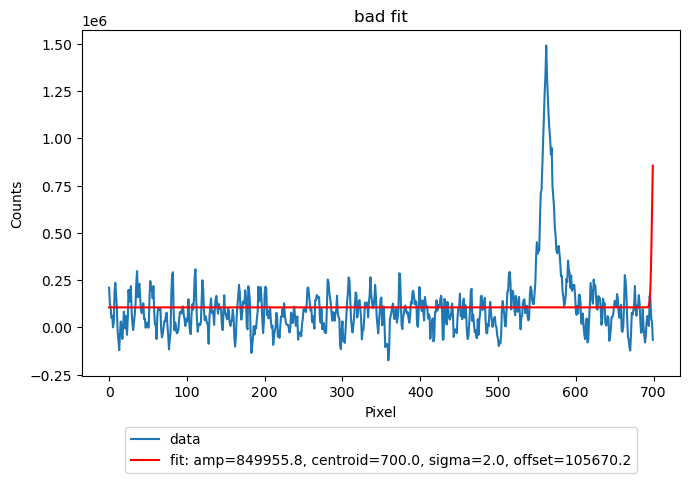

In [8]:
set_camera("192.168.2.139")
DYG15.test_measurement()